### If email is spam , it will give "1" as output. Else "0".

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [27]:
df.shape

(5728, 2)

In [28]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: re : weather and energy price data  m...    2
1     1368   1368  Subject: in the heart of your business !  corp...    1

In [29]:
df['text'] = df['text'].str.replace('Subject:', '')

In [30]:
df.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [31]:
df.tail()

,text,spam
5723,re : research and development charges to gpg ...,0
5724,"re : receipts from visit jim , thanks again...",0
5725,re : enron case study update wow ! all on th...,0
5726,"re : interest david , please , call shirley...",0
5727,news : aurora 5 . 2 update aurora version 5 ...,0


In [32]:
df['text'] = df['text'].str.replace('re :', '')
df.tail()

,text,spam
5723,research and development charges to gpg her...,0
5724,"receipts from visit jim , thanks again for...",0
5725,enron case study update wow ! all on the sa...,0
5726,"interest david , please , call shirley cre...",0
5727,news : aurora 5 . 2 update aurora version 5 ...,0


In [33]:
df['text'] = df['text'].str.replace('news :', '')
df.tail()

,text,spam
5723,research and development charges to gpg her...,0
5724,"receipts from visit jim , thanks again for...",0
5725,enron case study update wow ! all on the sa...,0
5726,"interest david , please , call shirley cre...",0
5727,aurora 5 . 2 update aurora version 5 . 2 -...,0


In [34]:
import seaborn as sns

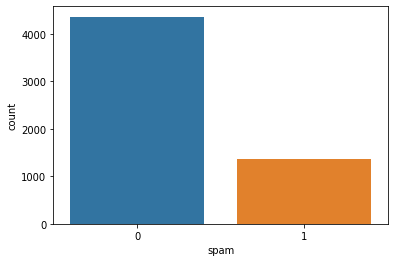

In [35]:
plot = sns.countplot(df["spam"])

In [36]:
spam = df["spam"]
spam

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

In [37]:
text = df["text"]
text

0        naturally irresistible your corporate identit...
1        the stock trading gunslinger  fanny is merril...
2        unbelievable new homes made easy  im wanting ...
3        4 color printing special  request additional ...
4        do not have money , get software cds from her...
                              ...                        
5723      research and development charges to gpg  her...
5724      receipts from visit  jim ,  thanks again for...
5725      enron case study update  wow ! all on the sa...
5726      interest  david ,  please , call shirley cre...
5727      aurora 5 . 2 update  aurora version 5 . 2  -...
Name: text, Length: 5728, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text,spam, test_size = 0.10,random_state =2)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)

In [40]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
x_test_count = v.transform(x_test)
model.score(x_test_count, y_test)

0.9965095986038395

In [42]:
emails = [
    'can we get together to watch footbal game tomorrow?',
    'Is that seriously how you spell his name?',
    'Your free ringtone is waiting to be collected.',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 0, 1, 1])